**Ejercicio:** Tareas Semana 2<br>
**Ejemplo práctico:** Información respecto a cantidad de horas de estudio y calificaciones obtenidas por varios estudiante<br>
**Por:** Laura Leyva

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Crear un dataset
x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y=[30,45,48,55,68,75, 85, 89, 92, 95]

data_dict = {"study_hours":x,
             "scores":y}

# Convierte un dictionario en un dataframe
print("\nRegresión Lineal Simple")
df = pd.DataFrame(data_dict)
df


Regresión Lineal Simple


,study_hours,scores
0,1,30
1,2,45
2,3,48
3,4,55
4,5,68
5,6,75
6,7,85
7,8,89
8,9,92
9,10,95


In [ ]:
#Calculos Iniciales
df['xy'] = df['study_hours']*df['scores']
df['x2'] = df['study_hours']**2
df

,study_hours,scores,xy,x2
0,1,30,30,1
1,2,45,90,4
2,3,48,144,9
3,4,55,220,16
4,5,68,340,25
5,6,75,450,36
6,7,85,595,49
7,8,89,712,64
8,9,92,828,81
9,10,95,950,100


**Actividad 1:** Crear otra columna con enteros y convertirla en flotante.

In [ ]:
df['SCORES'] = df['scores'].astype(float)
df

,study_hours,scores,xy,x2,SCORES
0,1,30,30,1,30.0
1,2,45,90,4,45.0
2,3,48,144,9,48.0
3,4,55,220,16,55.0
4,5,68,340,25,68.0
5,6,75,450,36,75.0
6,7,85,595,49,85.0
7,8,89,712,64,89.0
8,9,92,828,81,92.0
9,10,95,950,100,95.0


**Actividad 2:** Como verificar que una columna contiene un string

In [ ]:
df['test_string_a']= ['alto','sobresaliente','aceptable','deficiente','aceptable',5, 1, 2, 3, 4]
df['test_string_b']= ['alto','sobresaliente','aceptable','deficiente','alto','sobresaliente','aceptable','deficiente','bajo','alto']
df['test_string_c']= ['alto','sobresaliente','aceptable','deficiente','aceptable',5, 1, 2, 3, 4]

test=['test_string_a','test_string_b','test_string_c']

# Función para verficar si la columna contiene un string
for i in range(3):
  res=df[test[i]].apply(lambda x: isinstance(x, str)).all()
  if res:
    print("La columna:",test[i],", solo contiene valores string")
  else:
    print("La columna:",test[i],", no solo contiene valores string")


La columna: test_string_a , no solo contiene valores string
La columna: test_string_b , solo contiene valores string
La columna: test_string_c , no solo contiene valores string


**Actividad 3:** Eliminar columnas innecesarias

In [ ]:
#Nota: Ejecutar línea anterior, para poder eliminar las columnas
#Link: https://docs.kanaries.net/es/topics/Python/dataframe-drop-column
df = df.drop (['test_string_a','test_string_b','test_string_c','SCORES'], axis = 1)
df

,study_hours,scores,xy,x2
0,1,30,30,1
1,2,45,90,4
2,3,48,144,9
3,4,55,220,16
4,5,68,340,25
5,6,75,450,36
6,7,85,595,49
7,8,89,712,64
8,9,92,828,81
9,10,95,950,100


**Actividad 4:** Clasificar en 3 Categorías

In [ ]:
#Variable Categórica (Aceptable,Sobresaliente,Excelente)
df['scale_scores'] = np.where(df['scores'] < 50, 'Aceptable', np.where(df['scores']  <= 80,'Sobresaliente','Excelente'))
df

,study_hours,scores,xy,x2,scale_scores
0,1,30,30,1,Aceptable
1,2,45,90,4,Aceptable
2,3,48,144,9,Aceptable
3,4,55,220,16,Sobresaliente
4,5,68,340,25,Sobresaliente
5,6,75,450,36,Sobresaliente
6,7,85,595,49,Excelente
7,8,89,712,64,Excelente
8,9,92,828,81,Excelente
9,10,95,950,100,Excelente


**Actividad 5:** Como usar la función .describe() para incluir variables categóricas

In [ ]:
descripcion_completa = df.describe(include='all') #Respuesta dada por ChatGPT
print (descripcion_completa)

        study_hours     scores          xy          x2 scale_scores
count      10.00000  10.000000   10.000000   10.000000           10
unique          NaN        NaN         NaN         NaN            3
top             NaN        NaN         NaN         NaN    Excelente
freq            NaN        NaN         NaN         NaN            4
mean        5.50000  68.200000  435.900000   38.500000          NaN
std         3.02765  22.670588  324.071477   34.173577          NaN
min         1.00000  30.000000   30.000000    1.000000          NaN
25%         3.25000  49.750000  163.000000   10.750000          NaN
50%         5.50000  71.500000  395.000000   30.500000          NaN
75%         7.75000  88.000000  682.750000   60.250000          NaN
max        10.00000  95.000000  950.000000  100.000000          NaN


**Actividad 6:** Carga y descarga de Dataframe como (.xlsx) y (.json)

In [ ]:
#------------Carga de archivos------------
#df_test = pd.read_excel("data.xlsx", sheet_name="Sheet1") # En el mismo directorio agregar el archivo data.xlsx
#df_test = pd.read_json("data.json") # En el mismo directorio agregar el archivo data.json

#-----------Descarga de archivos--------
df.to_excel("data_export.xlsx", sheet_name="Sheet1")
df.to_json("data_export.json")

# Descarga archivos , a través de Google Colab
# from google.colab import files

# files.download('data_export.xlsx')
# files.download('data_export.json')

**Actividad 7:** Matriz de Correlación y Regresión Lineal

Correlation Matrix:
             study_hours    scores        xy        x2
study_hours     1.000000  0.984221  0.992064  0.974559
scores          0.984221  1.000000  0.966655  0.929063
xy              0.992064  0.966655  1.000000  0.992007
x2              0.974559  0.929063  0.992007  1.000000


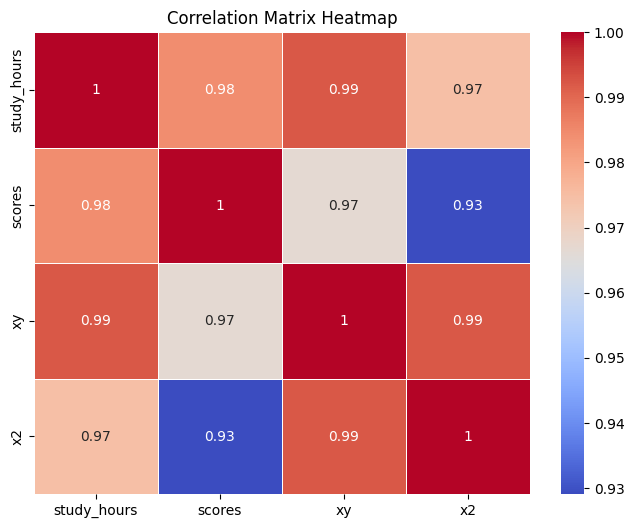

In [ ]:
# Calculate the correlation matrix
df = df.drop (['scale_scores'], axis = 1)
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
sumx=df['study_hours'].sum()
sumy=df['scores'].sum()
sumxy=df['xy'].sum()
sumx2=df['x2'].sum()
print("Sumatorias Columnas")
print("Horas_estudio:",sumx,"\nCalificaciones:",sumy,"\nxy:",sumxy,"\nx2:",sumx2)

Sumatorias Columnas
Horas_estudio: 55 
Calificaciones: 682 
xy: 4359 
x2: 385


In [ ]:
#Calculo Pendiente
n = int(len(df))
m=(n*sumxy-sumx*sumy)/(n*sumx2-sumx**2)
m=float(m)
#Punto de corte
b=(sumy/n)-m*(sumx/n)
b=float(b)
print("Pendiente:",m,"\nPunto de Corte:",b)

Pendiente: 7.36969696969697 
Punto de Corte: 27.666666666666664


In [ ]:
#Calculo Punto Final
xf = df['study_hours'].tail(1).values[0]
yf=m*(xf)+b
yf

101.36363636363637

In [ ]:
# Crear un dataset
x_final = [0,xf]
y_final = [b,yf]

data_dict_f = {"xf":x_final,
               "yf":y_final}

# Convierte un dictionario en un dataframe
dff = pd.DataFrame(data_dict_f)
dff

,xf,yf
0,0,27.666667
1,10,101.363636


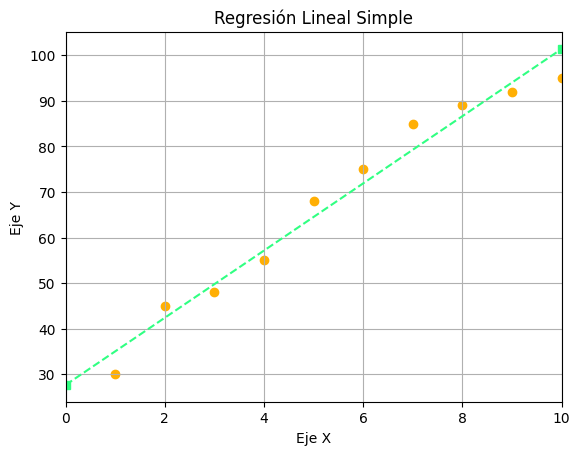

In [ ]:
# Crear el gráfico de dispersión
fig, ax = plt.subplots()
ax.scatter(x, y,color='#FFAF04')
ax.plot(x_final,y_final,marker='s', linestyle='--', color='#30FF82')

# Añadir títulos y etiquetas
plt.title('Regresión Lineal Simple')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
ax.set_xlim(0, 10)
ax.grid(True)

# Mostrar el gráfico
plt.show()

In [ ]:
#Suma cuadrados de residuos: Lista de Comprensión
sumf =sum([(y[i] - (m * x[i] + b)) ** 2 for i in range(n)])
print("Sr:", sumf)

Sr: 144.82424242424258


In [ ]:
#Suma cuadrados de residuos: Ciclo For
sumf=0
for i in range(n):
    res_sum =(y[i]-(m*x[i]+b))**2
    sumf += res_sum
print("Sr:",sumf)

Sr: 144.82424242424258
